In [52]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create Dataframes

In [2]:
data = pd.read_csv('/Users/mattcarey/Documents/UNCC/DTSC/Project Datasets/wages_by_education.csv')

In [3]:
data.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [4]:
data.columns

Index(['year', 'less_than_hs', 'high_school', 'some_college',
       'bachelors_degree', 'advanced_degree', 'men_less_than_hs',
       'men_high_school', 'men_some_college', 'men_bachelors_degree',
       'men_advanced_degree', 'women_less_than_hs', 'women_high_school',
       'women_some_college', 'women_bachelors_degree', 'women_advanced_degree',
       'white_less_than_hs', 'white_high_school', 'white_some_college',
       'white_bachelors_degree', 'white_advanced_degree', 'black_less_than_hs',
       'black_high_school', 'black_some_college', 'black_bachelors_degree',
       'black_advanced_degree', 'hispanic_less_than_hs',
       'hispanic_high_school', 'hispanic_some_college',
       'hispanic_bachelors_degree', 'hispanic_advanced_degree',
       'white_men_less_than_hs', 'white_men_high_school',
       'white_men_some_college', 'white_men_bachelors_degree',
       'white_men_advanced_degree', 'black_men_less_than_hs',
       'black_men_high_school', 'black_men_some_college',
   

In [7]:
black_data = data[['year', 'black_less_than_hs', 'black_high_school', 'black_some_college', 'black_bachelors_degree', 'black_advanced_degree']]

In [78]:
black_data.head()

,year,black_less_than_hs,black_high_school,black_some_college,black_bachelors_degree,black_advanced_degree
0,2022,15.19,19.39,21.34,33.39,44.67
1,2021,14.55,19.66,21.26,32.62,43.37
2,2020,14.55,19.66,21.79,33.64,45.76
3,2019,14.19,18.73,20.44,31.83,42.73
4,2018,13.31,18.14,19.98,32.00,42.22


In [9]:
hispanic_data = data[['year', 'hispanic_less_than_hs', 'hispanic_high_school', 'hispanic_some_college', 'hispanic_bachelors_degree', 'hispanic_advanced_degree']]

In [10]:
hispanic_data.head()

,year,hispanic_less_than_hs,hispanic_high_school,hispanic_some_college,hispanic_bachelors_degree,hispanic_advanced_degree
0,2022,17.32,20.72,22.96,36.00,48.30
1,2021,17.60,21.03,23.34,35.26,48.60
2,2020,17.61,21.46,23.24,36.13,48.58
3,2019,16.71,20.47,22.01,34.66,46.69
4,2018,16.44,20.13,21.74,33.19,44.83


In [12]:
white_data = data[['year', 'white_less_than_hs', 'white_high_school', 'white_some_college', 'white_bachelors_degree', 'white_advanced_degree']]

In [13]:
white_data.head()

,year,white_less_than_hs,white_high_school,white_some_college,white_bachelors_degree,white_advanced_degree
0,2022,15.70,23.31,26.28,43.30,53.30
1,2021,16.20,23.60,26.29,43.06,53.62
2,2020,17.01,24.00,26.90,43.16,53.80
3,2019,15.89,22.94,25.47,41.06,51.81
4,2018,16.05,23.02,25.15,40.49,51.80


In [14]:
y_values = data[['year']]

In [15]:
y_values.head()

,year
0,2022
1,2021
2,2020
3,2019
4,2018


# Less Than High School Education Models

## Black Linear Regression Model

In [88]:
bdm_less_than_hs = smf.ols(formula = "year ~ black_less_than_hs", data = black_data)

In [89]:
bdm_less_than_hs_results = bdm_less_than_hs.fit()

In [90]:
bdm_less_than_hs_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     52.18
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.34e-09
Time:                        21:22:44   Log-Likelihood:                -186.02
No. Observations:                  50   AIC:                             376.0
Df Residuals:                      48   BIC:                             379.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2187.1378     26.291     83.188      0.000    2134.275    2240.000
black_less_than_hs   -13.0983      1.813     -7.224      0.000     -16.744      -9.453
==============================================================================
Omnibus:                       15.658   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.075
Skew:                           1.221   Prob(JB):                     0.000119
Kurtosis:                       4.647   Cond. No.                         266.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

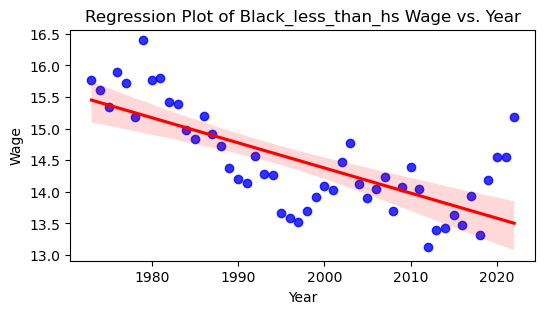

In [36]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="black_less_than_hs", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Black_less_than_hs Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Hispanic Linear Regression Model 

In [42]:
hdm_less_than_hs = smf.ols(formula = "year ~ hispanic_less_than_hs", data = hispanic_data)

In [43]:
hdm_less_than_hs_results = hdm_less_than_hs.fit()

In [45]:
hdm_less_than_hs_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04838
Date:                Tue, 14 Nov 2023   Prob (F-statistic):              0.827
Time:                        20:46:00   Log-Likelihood:                -204.39
No. Observations:                  50   AIC:                             412.8
Df Residuals:                      48   BIC:                             416.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1991.0034     29.610     67.242      0.000    1931.469    2050.537
hispanic_less_than_hs     0.4233      1.924      0.220      0.827      -3.446       4.292
==============================================================================
Omnibus:                       11.793   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.045
Skew:                          -0.076   Prob(JB):                        0.218
Kurtosis:                       1.801   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

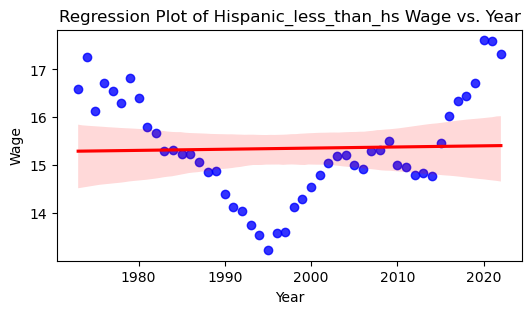

In [46]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="hispanic_less_than_hs", data=hispanic_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Hispanic_less_than_hs Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## White Linear Regression Model

In [47]:
wdm_less_than_hs = smf.ols(formula = "year ~ white_less_than_hs", data = white_data)

In [48]:
wdm_less_than_hs_results = wdm_less_than_hs.fit()

In [49]:
wdm_less_than_hs_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     33.53
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.23e-07
Time:                        20:47:39   Log-Likelihood:                -191.17
No. Observations:                  50   AIC:                             386.3
Df Residuals:                      48   BIC:                             390.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2124.2103     21.941     96.816      0.000    2080.095    2168.325
white_less_than_hs    -7.9203      1.368     -5.790      0.000     -10.670      -5.170
==============================================================================
Omnibus:                        7.756   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.484
Skew:                           0.945   Prob(JB):                       0.0237
Kurtosis:                       3.146   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

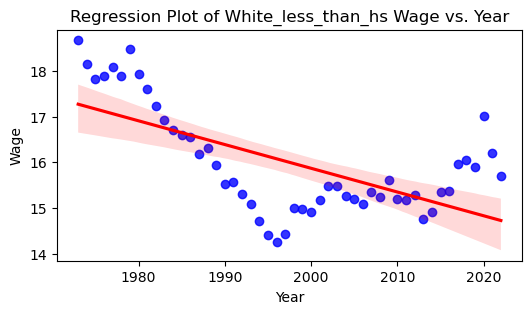

In [56]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="white_less_than_hs", data=white_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of White_less_than_hs Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Combined Linear Regression Models

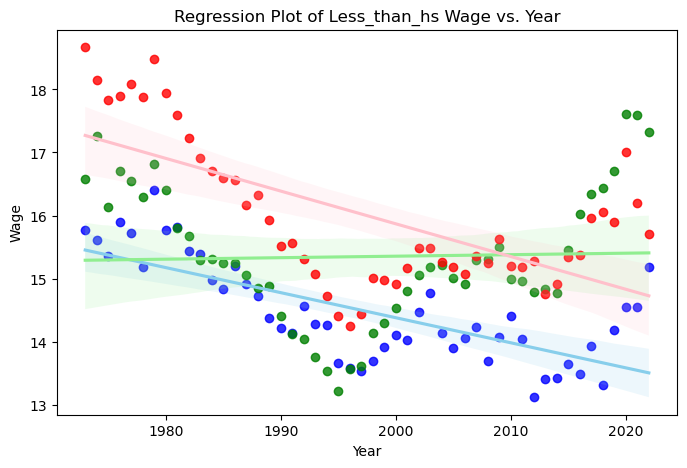

In [77]:
# Regression Plot
plt.figure(figsize=(8, 5))
sns.regplot(x="year", y="black_less_than_hs", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"})
sns.regplot(x="year", y="hispanic_less_than_hs", data=hispanic_data, scatter_kws={"color": "green"}, line_kws={"color": "lightgreen"})
sns.regplot(x="year", y="white_less_than_hs", data=white_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})

plt.title("Regression Plot of Less_than_hs Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

# High School Graduate Education Models

# Black Linear Regression Model

In [91]:
bdm_high_school = smf.ols(formula = "year ~ black_high_school", data = black_data)

In [92]:
bdm_high_school_results = bdm_high_school.fit()

In [93]:
bdm_high_school_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.05517
Date:                Tue, 14 Nov 2023   Prob (F-statistic):              0.815
Time:                        21:23:05   Log-Likelihood:                -204.39
No. Observations:                  50   AIC:                             412.8
Df Residuals:                      48   BIC:                             416.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1984.8589     53.860     36.852      0.000    1876.566    2093.152
black_high_school     0.6936      2.953      0.235      0.815      -5.244       6.631
==============================================================================
Omnibus:                       11.131   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                2.950
Skew:                          -0.052   Prob(JB):                        0.229
Kurtosis:                       1.815   Cond. No.                         473.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

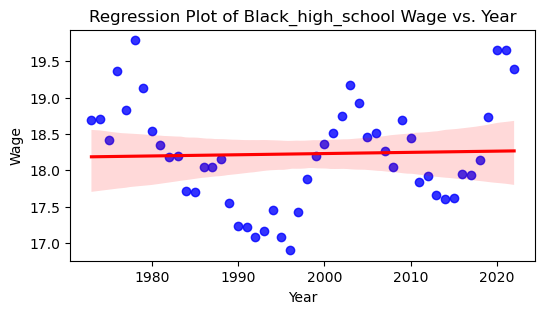

In [95]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="black_high_school", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Black_high_school Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

# Hispanic Linear Regression Model

In [97]:
hdm_high_school = smf.ols(formula = "year ~ hispanic_high_school", data = hispanic_data)

In [98]:
hdm_high_school_results = hdm_high_school.fit()

In [99]:
hdm_high_school_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.983
Date:                Tue, 14 Nov 2023   Prob (F-statistic):              0.165
Time:                        21:26:02   Log-Likelihood:                -203.40
No. Observations:                  50   AIC:                             410.8
Df Residuals:                      48   BIC:                             414.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1933.8129     45.269     42.718      0.000    1842.793    2024.833
hispanic_high_school     3.3371      2.370      1.408      0.165      -1.427       8.102
==============================================================================
Omnibus:                        8.513   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                3.706
Skew:                          -0.401   Prob(JB):                        0.157
Kurtosis:                       1.934   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

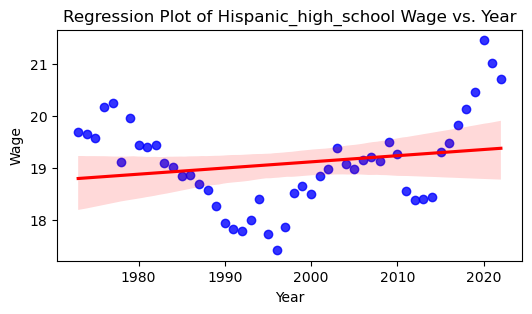

In [100]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="hispanic_high_school", data=hispanic_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Hispanic_high_school Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

# White Linear Regression Model

In [102]:
wdm_high_school = smf.ols(formula = "year ~ white_high_school", data = white_data)

In [103]:
wdm_high_school_results = wdm_high_school.fit()

In [104]:
wdm_high_school_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.73
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.24e-05
Time:                        21:28:17   Log-Likelihood:                -195.81
No. Observations:                  50   AIC:                             395.6
Df Residuals:                      48   BIC:                             399.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1808.7973     42.523     42.536      0.000    1723.298    1894.296
white_high_school     8.6985      1.958      4.441      0.000       4.761      12.636
==============================================================================
Omnibus:                        8.383   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.310
Skew:                          -0.996   Prob(JB):                       0.0157
Kurtosis:                       3.130   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

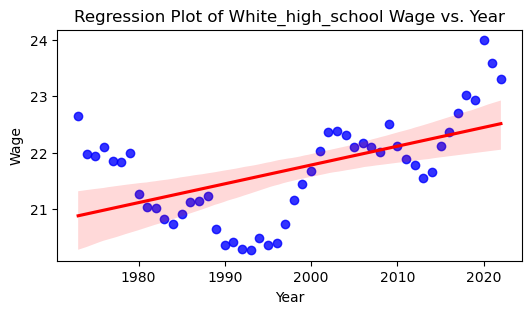

In [105]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="white_high_school", data=white_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of White_high_school Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

# Combined Linear Regression Models

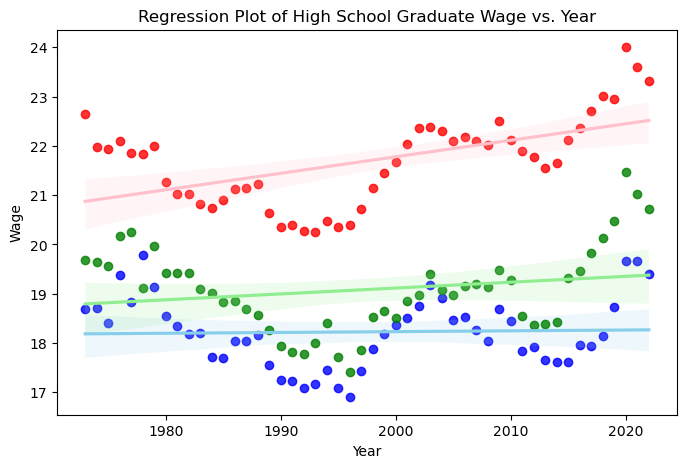

In [106]:
# Regression Plot
plt.figure(figsize=(8, 5))
sns.regplot(x="year", y="black_high_school", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"})
sns.regplot(x="year", y="hispanic_high_school", data=hispanic_data, scatter_kws={"color": "green"}, line_kws={"color": "lightgreen"})
sns.regplot(x="year", y="white_high_school", data=white_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})

plt.title("Regression Plot of High School Graduate Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

# Some College Education Models

## Black Linear Regression Model

In [107]:
bdm_some_college = smf.ols(formula = "year ~ black_some_college", data = black_data)

In [108]:
bdm_some_college_results = bdm_some_college.fit()

In [109]:
bdm_some_college_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2118
Date:                Tue, 14 Nov 2023   Prob (F-statistic):              0.647
Time:                        21:33:32   Log-Likelihood:                -204.31
No. Observations:                  50   AIC:                             412.6
Df Residuals:                      48   BIC:                             416.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2028.1910     66.724     30.397      0.000    1894.034    2162.348
black_some_college    -1.4969      3.253     -0.460      0.647      -8.037       5.043
==============================================================================
Omnibus:                       11.872   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.025
Skew:                           0.043   Prob(JB):                        0.220
Kurtosis:                       1.798   Cond. No.                         660.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

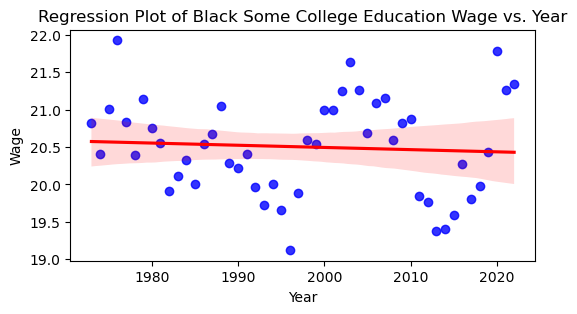

In [110]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="black_some_college", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Black Some College Education Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Hispanic Linear Regression Model

In [112]:
hdm_some_college = smf.ols(formula = "year ~ hispanic_some_college", data = hispanic_data)

In [113]:
hdm_some_college_results = hdm_some_college.fit()

In [114]:
hdm_some_college_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     6.760
Date:                Tue, 14 Nov 2023   Prob (F-statistic):             0.0123
Time:                        21:36:32   Log-Likelihood:                -201.12
No. Observations:                  50   AIC:                             406.2
Df Residuals:                      48   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1847.3022     57.799     31.961      0.000    1731.089    1963.516
hispanic_some_college     7.0323      2.705      2.600      0.012       1.594      12.470
==============================================================================
Omnibus:                        1.836   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.341
Skew:                          -0.170   Prob(JB):                        0.511
Kurtosis:                       2.273   Cond. No.                         635.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

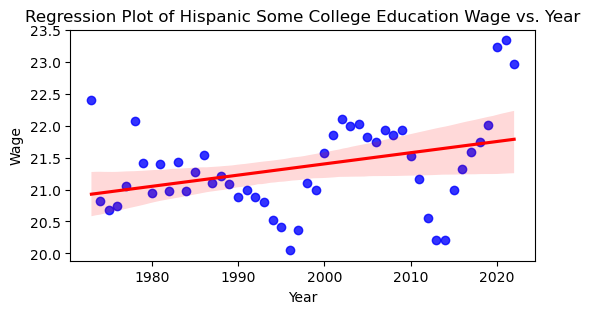

In [116]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="hispanic_some_college", data=hispanic_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Hispanic Some College Education Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## White Linear Regression Model

In [118]:
wdm_some_college = smf.ols(formula = "year ~ white_some_college", data = white_data)

In [119]:
wdm_some_college_results = wdm_some_college.fit()

In [120]:
wdm_some_college_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     42.91
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.60e-08
Time:                        21:38:41   Log-Likelihood:                -188.45
No. Observations:                  50   AIC:                             380.9
Df Residuals:                      48   BIC:                             384.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1761.5019     36.060     48.850      0.000    1688.999    1834.004
white_some_college     9.8441      1.503      6.550      0.000       6.822      12.866
==============================================================================
Omnibus:                        2.410   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.838
Skew:                          -0.468   Prob(JB):                        0.399
Kurtosis:                       3.072   Cond. No.                         573.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

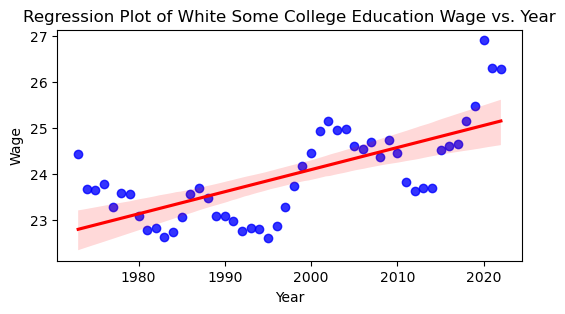

In [121]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="white_some_college", data=white_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of White Some College Education Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Combined Linear Regression Models

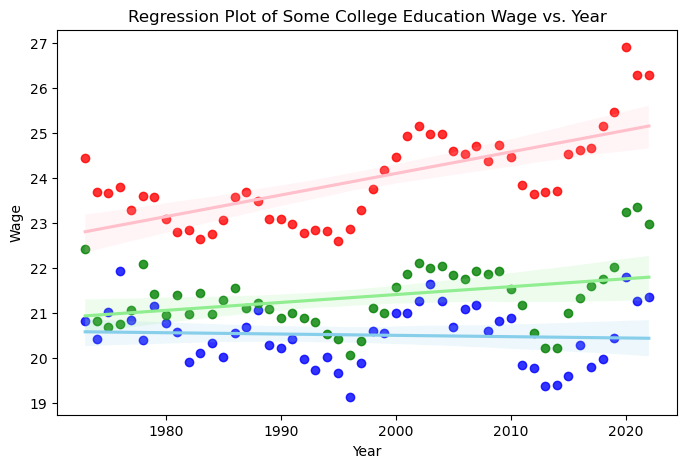

In [123]:
# Regression Plot
plt.figure(figsize=(8, 5))
sns.regplot(x="year", y="black_some_college", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"})
sns.regplot(x="year", y="hispanic_some_college", data=hispanic_data, scatter_kws={"color": "green"}, line_kws={"color": "lightgreen"})
sns.regplot(x="year", y="white_some_college", data=white_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})

plt.title("Regression Plot of Some College Education Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

# Bachelor's Degree Models

## Black Linear Regression Model

In [125]:
bdm_bachelors = smf.ols(formula = "year ~ black_bachelors_degree", data = black_data)

In [126]:
bdm_bachelors_results = bdm_bachelors.fit()

In [127]:
bdm_bachelors_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     164.7
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.95e-17
Time:                        21:43:14   Log-Likelihood:                -167.20
No. Observations:                  50   AIC:                             338.4
Df Residuals:                      48   BIC:                             342.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1830.6826     13.037    140.422      0.000    1804.470    1856.895
black_bachelors_degree     5.6412      0.440     12.833      0.000       4.757       6.525
==============================================================================
Omnibus:                       10.123   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.604
Skew:                          -0.978   Prob(JB):                      0.00821
Kurtosis:                       3.887   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

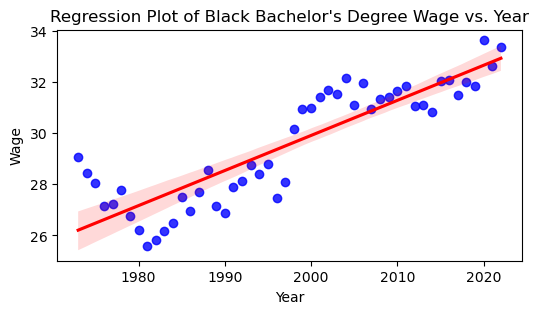

In [128]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="black_bachelors_degree", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Black Bachelor's Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Hispanic Linear Regression Model

In [130]:
hdm_bachelors = smf.ols(formula = "year ~ hispanic_bachelors_degree", data = hispanic_data)

In [131]:
hdm_bachelors_results = hdm_bachelors.fit()

In [132]:
hdm_bachelors_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           7.48e-22
Time:                        21:46:03   Log-Likelihood:                -155.92
No. Observations:                  50   AIC:                             315.8
Df Residuals:                      48   BIC:                             319.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1851.3220      8.681    213.264      0.000    1833.868    1868.776
hispanic_bachelors_degree     4.8079      0.284     16.909      0.000       4.236       5.380
==============================================================================
Omnibus:                        5.673   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.708
Skew:                          -0.558   Prob(JB):                       0.0950
Kurtosis:                       4.007   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

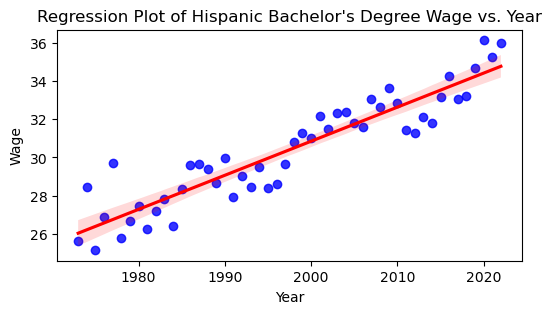

In [133]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="hispanic_bachelors_degree", data=hispanic_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Hispanic Bachelor's Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## White Linear Regression Model

In [134]:
wdm_bachelors = smf.ols(formula = "year ~ white_bachelors_degree", data = white_data)

In [135]:
wdm_bachelors_results = wdm_bachelors.fit()

In [136]:
wdm_bachelors_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     360.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           6.02e-24
Time:                        21:47:05   Log-Likelihood:                -150.92
No. Observations:                  50   AIC:                             305.8
Df Residuals:                      48   BIC:                             309.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1864.8029      7.030    265.245      0.000    1850.667    1878.939
white_bachelors_degree     3.7221      0.196     18.973      0.000       3.328       4.117
==============================================================================
Omnibus:                        4.485   Durbin-Watson:                   0.254
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.468
Skew:                          -0.613   Prob(JB):                        0.177
Kurtosis:                       3.401   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

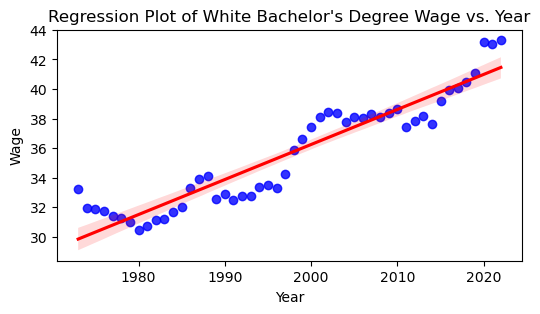

In [137]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="white_bachelors_degree", data=white_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of White Bachelor's Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Combined Linear Regression Models

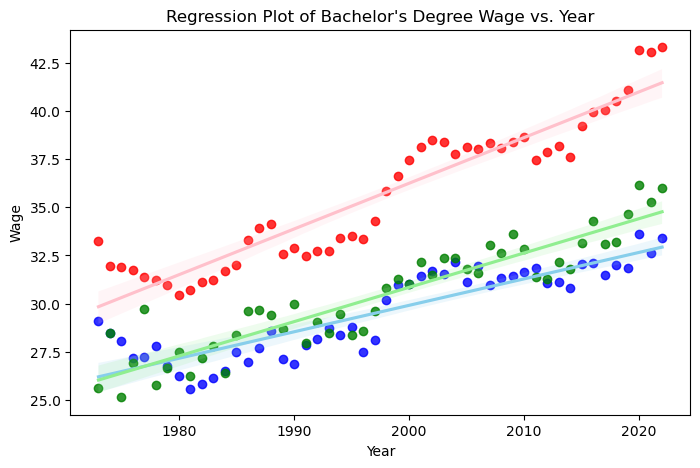

In [139]:
# Regression Plot
plt.figure(figsize=(8, 5))
sns.regplot(x="year", y="black_bachelors_degree", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"})
sns.regplot(x="year", y="hispanic_bachelors_degree", data=hispanic_data, scatter_kws={"color": "green"}, line_kws={"color": "lightgreen"})
sns.regplot(x="year", y="white_bachelors_degree", data=white_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})

plt.title("Regression Plot of Bachelor's Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

# Advanced Degree Models

## Black Linear Regression Model

In [141]:
bdm_advanced = smf.ols(formula = "year ~ black_advanced_degree", data = black_data)

In [142]:
bdm_advanced_results = bdm_advanced.fit()

In [143]:
bdm_advanced_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     81.98
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.90e-12
Time:                        21:50:41   Log-Likelihood:                -179.51
No. Observations:                  50   AIC:                             363.0
Df Residuals:                      48   BIC:                             366.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1861.9978     15.019    123.977      0.000    1831.800    1892.195
black_advanced_degree     3.5376      0.391      9.054      0.000       2.752       4.323
==============================================================================
Omnibus:                       34.452   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.711
Skew:                          -1.960   Prob(JB):                     2.44e-19
Kurtosis:                       8.077   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

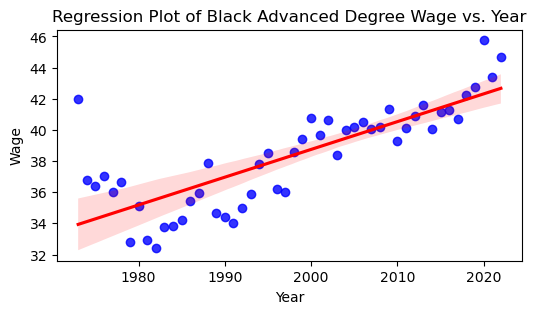

In [144]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="black_advanced_degree", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Black Advanced Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Hispanic Linear Regression Model

In [145]:
hdm_advanced = smf.ols(formula = "year ~ hispanic_advanced_degree", data = hispanic_data)

In [146]:
hdm_advanced_results = hdm_advanced.fit()

In [147]:
hdm_advanced_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     247.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.45e-20
Time:                        21:52:18   Log-Likelihood:                -159.00
No. Observations:                  50   AIC:                             322.0
Df Residuals:                      48   BIC:                             325.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1895.0026      6.573    288.309      0.000    1881.787    1908.218
hispanic_advanced_degree     2.5695      0.163     15.723      0.000       2.241       2.898
==============================================================================
Omnibus:                        1.568   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                0.817
Skew:                          -0.254   Prob(JB):                        0.665
Kurtosis:                       3.366   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

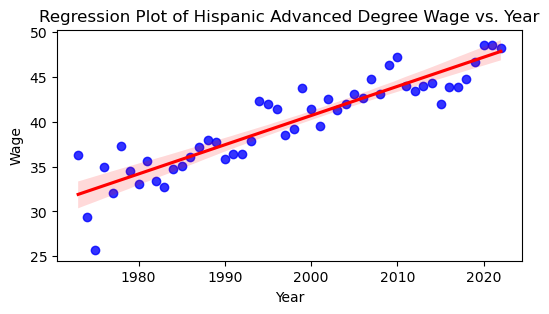

In [152]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="hispanic_advanced_degree", data=hispanic_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of Hispanic Advanced Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## White Linear Regression Model

In [148]:
wdm_advanced = smf.ols(formula = "year ~ white_advanced_degree", data = white_data)

In [149]:
wdm_advanced_results = wdm_advanced.fit()

In [150]:
wdm_advanced_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     689.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.90e-30
Time:                        21:53:53   Log-Likelihood:                -136.10
No. Observations:                  50   AIC:                             276.2
Df Residuals:                      48   BIC:                             280.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1882.3582      4.416    426.278      0.000    1873.480    1891.237
white_advanced_degree     2.5964      0.099     26.266      0.000       2.398       2.795
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.120
Skew:                          -0.076   Prob(JB):                        0.942
Kurtosis:                       2.814   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

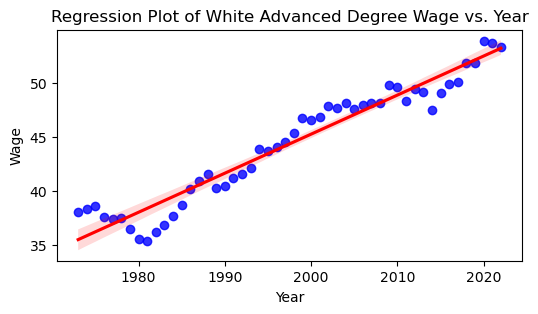

In [151]:
# Regression Plot
plt.figure(figsize=(6, 3))
sns.regplot(x="year", y="white_advanced_degree", data=white_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot of White Advanced Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()

## Combined Linear Regression Models

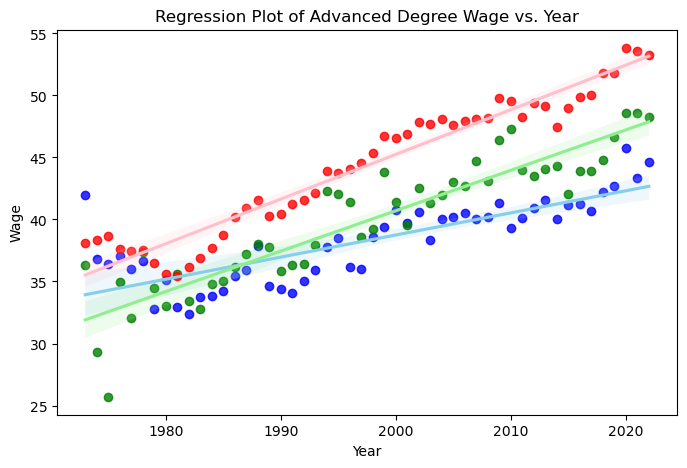

In [153]:
# Regression Plot
plt.figure(figsize=(8, 5))
sns.regplot(x="year", y="black_advanced_degree", data=black_data, scatter_kws={"color": "blue"}, line_kws={"color": "skyblue"})
sns.regplot(x="year", y="hispanic_advanced_degree", data=hispanic_data, scatter_kws={"color": "green"}, line_kws={"color": "lightgreen"})
sns.regplot(x="year", y="white_advanced_degree", data=white_data, scatter_kws={"color": "red"}, line_kws={"color": "pink"})

plt.title("Regression Plot of Advanced Degree Wage vs. Year")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.savefig('regression_plot.png')
plt.show()